# WITH SEABORN

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

INSTRUCTIONS
1. Box and Swarm Plots in kill data
1. Most dangerous cities
1. Most dangerous states
1. Having mental ilness or not for killed people
1. Threat types
1. Flee types
<br>

read data

if didn't work you can use this parameters: encoding="windows-1252"

In [8]:
df=pd.read_csv("PoliceKillingsUS.csv",encoding="windows-1252")
df.sample(5)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
1443,1633,William Thomas Hennessey,18/06/16,shot,toy weapon,34.0,M,W,Huntsville,AL,False,attack,Not fleeing,True
659,795,Rafael Cruz Jr,29/08/15,shot,unarmed,29.0,M,H,Chicago,IL,False,undetermined,Car,False
382,477,Dalton Branch,26/05/15,shot,gun,51.0,M,B,Queens,NY,False,attack,Not fleeing,False
108,148,Matthew D. Belk,13/02/15,shot,gun,27.0,M,W,McLemoresville,TN,False,attack,Not fleeing,False
2488,2773,TK TK,12/07/17,shot,blunt object,NaN,M,NaN,Grover Beach,CA,False,other,Not fleeing,False


In [5]:
df.describe()

,id,age
count,2535.000000,2458.000000
mean,1445.731755,36.605370
std,794.259490,13.030774
min,3.000000,6.000000
25%,768.500000,26.000000
50%,1453.000000,34.000000
75%,2126.500000,45.000000
max,2822.000000,91.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

In [9]:
df.shape

(2535, 14)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


(2535, 14)

## 1a: Box plot of age in both genders separeted by manner of death.

In [10]:
df[["age","gender","manner_of_death"]]

,age,gender,manner_of_death
0,53.0,M,shot
1,47.0,M,shot
2,23.0,M,shot and Tasered
3,32.0,M,shot
4,39.0,M,shot
...,...,...,...
2530,31.0,M,shot
2531,NaN,M,shot
2532,48.0,M,shot
2533,28.0,M,shot


In [12]:
df["manner_of_death"].unique()

array(['shot', 'shot and Tasered'], dtype=object)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


array(['shot', 'shot and Tasered'], dtype=object)

**INSTRUCTION: Demonstrate the Qurtiles of age in both genders separeted by manner of death.**

<AxesSubplot:xlabel='gender', ylabel='age'>

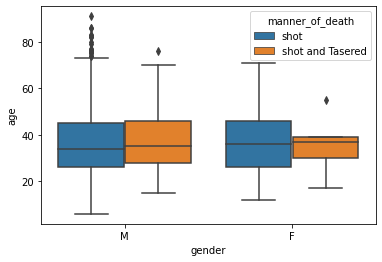

In [14]:
sns.boxplot(data= df, x="gender", y="age", hue="manner_of_death")

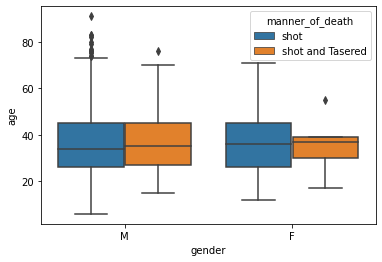

In [ ]:
# with seaborn


## 1b: Swarm Plot 

**INSTRUCTION: Demonstrate the age in both genders separeted by manner of death by a swarm plot.**

<AxesSubplot:xlabel='gender', ylabel='age'>

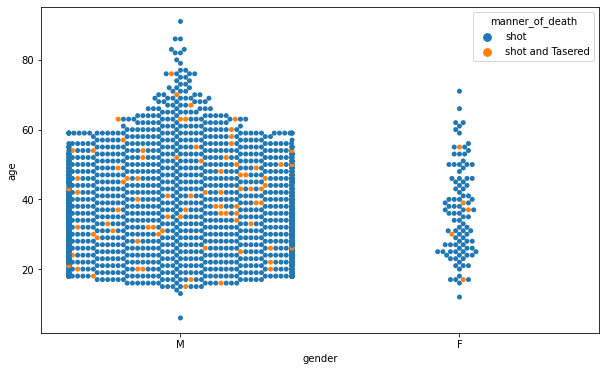

In [18]:
plt.figure(figsize=(10,6))
sns.swarmplot(data= df, x="gender", y="age", hue="manner_of_death")

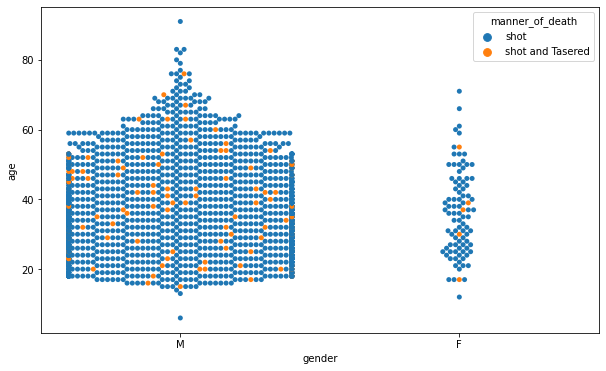

In [ ]:
# with seaborn


## 2: Plot 12 most dangerous cities

In [29]:
df.dropna(inplace=True)

<AxesSubplot:>

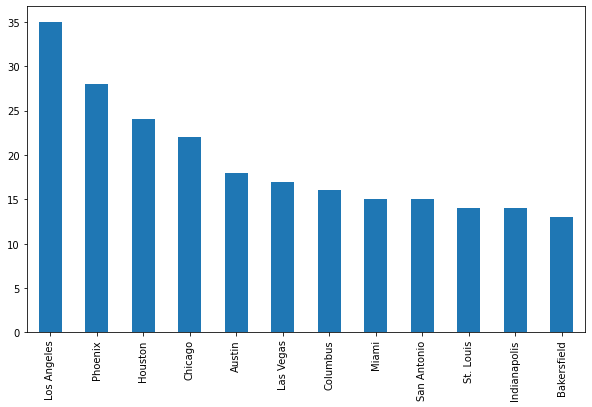

In [64]:
fig, ax= plt.subplots(figsize=(10,6))
df["city"].value_counts().head(12).plot(kind="bar", ax=ax) ####with pandas bar plot

In [47]:
#df=pd.read_csv("PoliceKillingsUS.csv",encoding="windows-1252")

In [135]:
top_list=df["city"].value_counts().head(12)

In [136]:
top_list

Los Angeles     35
Phoenix         28
Houston         24
Chicago         22
Austin          18
Las Vegas       17
Columbus        16
Miami           15
San Antonio     15
St. Louis       14
Indianapolis    14
Bakersfield     13
Name: city, dtype: int64

<bound method DataFrame.reset_index of Empty DataFrame
Columns: [(City,), (Nums,)]
Index: []>

Los Angeles      35
Phoenix          28
Houston          24
Chicago          22
Austin           18
Las Vegas        17
Columbus         16
San Antonio      15
Miami            15
Indianapolis     14
St. Louis        14
Oklahoma City    13
Name: city, dtype: int64

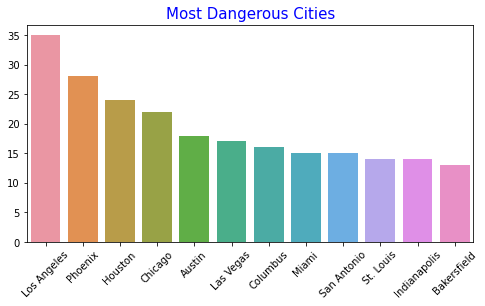

In [145]:
plt.figure(figsize=(8,4))
sns.barplot(y=top_list.values, x=top_list.index )
plt.title("Most Dangerous Cities", color="Blue", fontsize=15)
plt.xticks(rotation=45);

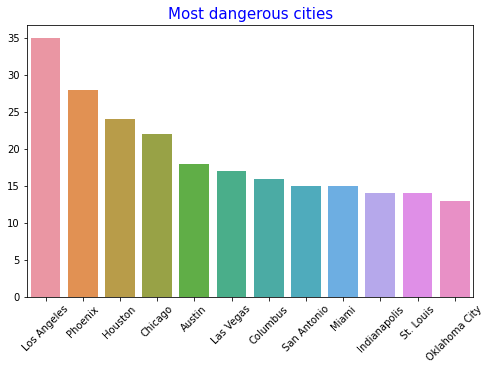

In [ ]:
# with seaborn barplot



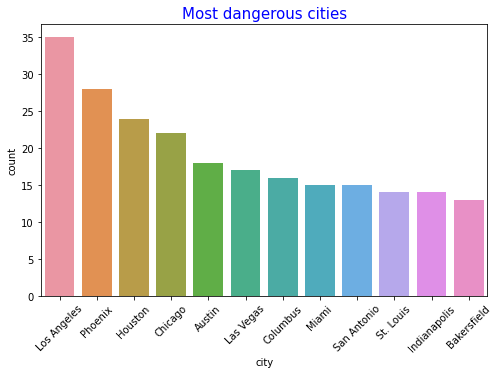

In [149]:
plt.figure(figsize = (8,5))
sns.countplot(x = "city", data = df, order = df['city'].value_counts().index[:12])
plt.title("Most dangerous cities", color = "Blue", fontsize = 15)
plt.xticks(rotation=45);

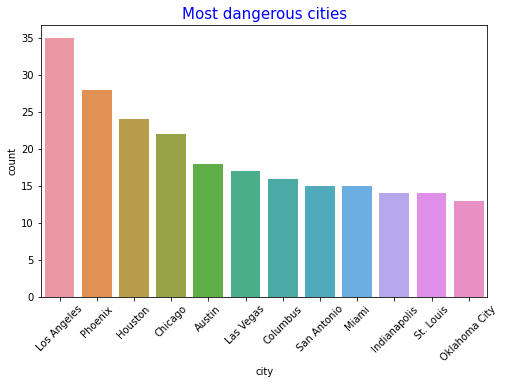

In [ ]:
# with seaborn countplot


## 3: Plot 20 most dangerous states

In [152]:
df["state"].value_counts()[:20]

CA    366
TX    200
FL    136
AZ    105
OH     70
NC     66
OK     65
CO     63
GA     61
MO     58
IL     56
TN     56
WA     51
LA     47
AL     45
PA     45
NY     43
VA     43
WI     42
NM     41
Name: state, dtype: int64

In [153]:
Danger_state=df["state"].value_counts()[:20]

CA    366
TX    200
FL    136
AZ    105
OH     70
NC     66
OK     65
CO     63
GA     61
MO     58
TN     56
IL     56
WA     51
LA     47
PA     45
AL     45
NY     43
VA     43
WI     42
NM     41
Name: state, dtype: int64

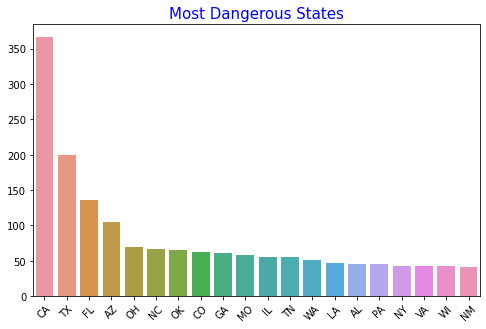

In [157]:
plt.figure(figsize=(8,5))
sns.barplot(y=Danger_state.values, x=Danger_state.index)
plt.title("Most Dangerous States", color="Blue", fontsize=15)
plt.xticks(rotation=45);

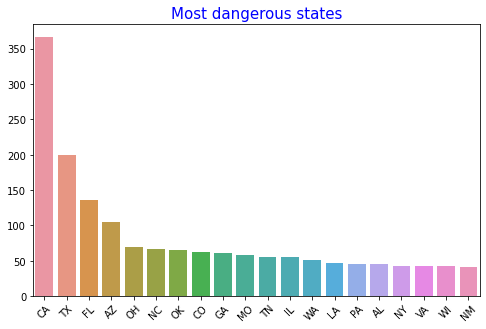

In [ ]:
# with seaborn barplot


In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(y=Danger_state.values, x=Danger_state.index)
plt.title("Most Dangerous States", color="Blue", fontsize=15)
plt.xticks(rotation=45);

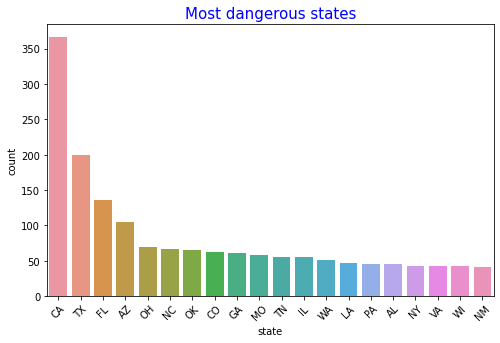

In [ ]:
# with seaborn countplot


## 4: Plot Having mental ilness or not for killed people

In [158]:
df["signs_of_mental_illness"].value_counts()

False    1681
True      573
Name: signs_of_mental_illness, dtype: int64

In [159]:
mental_ilness=df["signs_of_mental_illness"].value_counts()

False    1681
True      573
Name: signs_of_mental_illness, dtype: int64

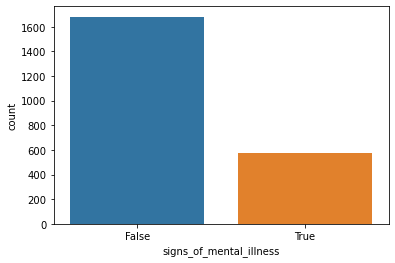

In [165]:
sns.barplot(x=mental_ilness.index, y=mental_ilness.values)
plt.xlabel("signs_of_mental_illness")
plt.ylabel("count");

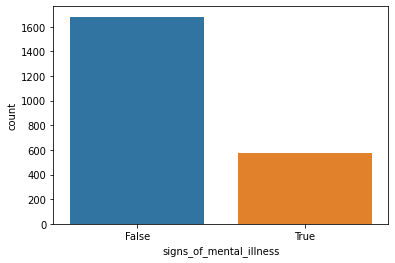

In [ ]:
# with seaborn


## 5: Plot number of Threat Types

In [167]:
df["threat_level"].value_counts()

attack          1462
other            677
undetermined     115
Name: threat_level, dtype: int64

In [168]:
type_threat=df["threat_level"].value_counts()

attack          1462
other            677
undetermined     115
Name: threat_level, dtype: int64

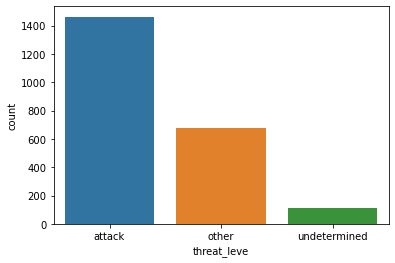

In [172]:
sns.barplot(x=type_threat.index, y=type_threat.values)
plt.ylabel("count")
plt.xlabel("threat_leve");

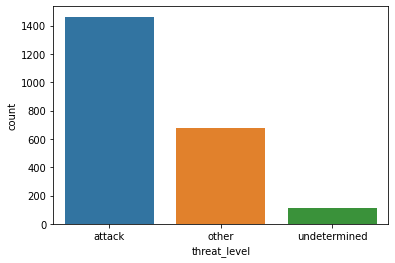

In [ ]:
# with seaborn


## 6: Plot number of Flee Types

In [173]:
df["flee"].value_counts()

Not fleeing    1528
Car             360
Foot            278
Other            88
Name: flee, dtype: int64

In [174]:
flee=df["flee"].value_counts()

Not fleeing    1528
Car             360
Foot            278
Other            88
Name: flee, dtype: int64

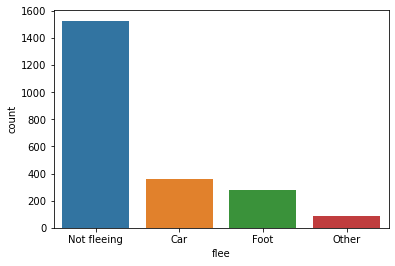

In [176]:
sns.barplot(x=flee.index, y=flee.values)
plt.xlabel("flee")
plt.ylabel("count");

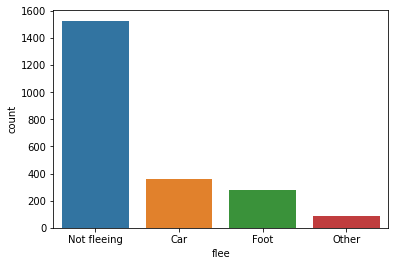

In [ ]:
# with seaborn


In [177]:
pwd

'C:\\Users\\Lenovo\\Downloads'